## The third In-class-exercise (10/06/2022, 40 points in total)

The purpose of this exercise is to understand text representation.

Question 1 (10 points): Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

In [1]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

"""


The idea is to classify a movie into good avg and bad ratings, based on the following features

1. Release Year of the film - There has been a realtion between the year of the film and the genre of the film throught the history. Some genre films are appreciated in a particular time.
2. Countries realeased -  Some movies are more appreaciated in some countries. So this can be helpful in predicitng the rating
3. Genre of the film - As discussed above, The Genre of the film when combined with release year might help in predicting the rating of the film
4. Runtime of the film - Runtime also has significant role in deciding whether it is apprecated or not, thus will be helpful in predicting the rating
5. Language of the Film - Language of the film, also helps in predicting the rating


"""

'\n\n\nThe idea is to classify a movie into good avg and bad ratings, based on the following features\n\n1. Release Year of the film - There has been a realtion between the year of the film and the genre of the film throught the history. Some genre films are appreciated in a particular time.\n2. Countries realeased -  Some movies are more appreaciated in some countries. So this can be helpful in predicitng the rating\n3. Genre of the film - As discussed above, The Genre of the film when combined with release year might help in predicting the rating of the film\n4. Runtime of the film - Runtime also has significant role in deciding whether it is apprecated or not, thus will be helpful in predicting the rating\n5. Language of the Film - Language of the film, also helps in predicting the rating\n\n\n'

Question 2 (20 points): Write python code to extract these features you discussed above. You can collect a few sample text data for the feature extraction. 

In [2]:
# You code here (Please add comments in the code):

#Installing IMDbPY Library. This is a python wrapper for the API from IMDB
!pip install IMDbPY




In [3]:
import random
import imdb

In [4]:
ia = imdb.IMDb()

In [5]:
import pandas as pd

In [6]:
#Fetching the required features data for 100 films
cnt=0
main_list = []
while cnt!=100:
    movie_id = random.randrange(100000)

    try:
        search_results = ia.get_movie(str(movie_id)).data
        release_year = search_results["year"]
        countries_released = search_results["countries"]
        film_genre = search_results["genres"]
        film_runtime = search_results["runtimes"]
        film_language = search_results["languages"]
        film_rating = search_results["rating"]
        cnt = cnt+1
        print(cnt)
    except:
        continue
    
    temp_dict = {"release_year":release_year,"countries_released":countries_released,"film_genre":film_genre,
     "film_runtime":film_runtime,"film_language":film_language,"film_rating":film_rating}
    main_list.append(temp_dict)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


2022-10-10 01:37:36,298 CRITICAL [imdbpy] /Users/porteruser/opt/anaconda3/lib/python3.9/site-packages/imdb/_exceptions.py:32: IMDbDataAccessError exception raised; args: ({'errcode': None, 'errmsg': 'None', 'url': 'https://www.imdb.com/title/tt0066642/reference', 'proxy': '', 'exception type': 'IOError', 'original exception': <HTTPError 404: ''>},); kwds: {}
Traceback (most recent call last):
  File "/Users/porteruser/opt/anaconda3/lib/python3.9/site-packages/imdb/parser/http/__init__.py", line 221, in retrieve_unicode
    response = uopener.open(url)
  File "/Users/porteruser/opt/anaconda3/lib/python3.9/urllib/request.py", line 523, in open
    response = meth(req, response)
  File "/Users/porteruser/opt/anaconda3/lib/python3.9/urllib/request.py", line 632, in http_response
    response = self.parent.error(
  File "/Users/porteruser/opt/anaconda3/lib/python3.9/urllib/request.py", line 561, in error
    return self._call_chain(*args)
  File "/Users/porteruser/opt/anaconda3/lib/python3.

35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [7]:
df = pd.DataFrame(main_list)

In [8]:
df.to_csv("reviews_1.csv",index = False)

In [9]:
df = pd.read_csv("reviews.csv")

In [10]:
def classify(rating):
    if rating > 8:
        return 'Good'
    elif rating > 5:
        return "Average"
    else:
        return 'Bad'

In [11]:
df["film_review"] = df.film_rating.apply(lambda x: classify(x))

In [12]:
#Converting the runtime from string format to integer
df.film_runtime = df.film_runtime.apply(lambda x: int(x.strip("[]''")))

In [13]:
df['countries_released'] = df.countries_released.apply(lambda x: eval(x))
df['film_genre'] = df.film_genre.apply(lambda x: eval(x))
df['film_language'] = df.film_language.apply(lambda x: eval(x))

In [14]:
df['n_countries_released'] = df['countries_released'].apply(lambda x: len(x))

In [15]:
df['n_film_genre'] = df['film_genre'].apply(lambda x: len(x))

In [16]:
df['n_film_language'] = df['film_language'].apply(lambda x: len(x))

Question 3 (10 points): Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)." Select the most important features you extracted above, rank the features based on their importance in the descending order. 

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
RF = RandomForestClassifier(n_estimators = 100, max_depth=2, random_state = 108)

In [19]:
df.columns 

Index(['release_year', 'countries_released', 'film_genre', 'film_runtime',
       'film_language', 'film_rating', 'film_review', 'n_countries_released',
       'n_film_genre', 'n_film_language'],
      dtype='object')

In [20]:
X_cols = ['release_year','film_runtime','n_countries_released','n_film_genre','n_film_language']

In [21]:
y_col = ['film_review']

In [22]:
X = df[X_cols]

In [23]:
y = df[y_col]

In [24]:
!pip install mlxtend

**Implemention Forward selection, which is a wrapper method for feature selection**

In [25]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [26]:
sfs = SFS(RandomForestClassifier(),
          k_features=3,
          forward=True,
          cv = 0)

In [27]:
sfs.fit(X, y)

/Users/porteruser/opt/anaconda3/lib/python3.9/site-packages/mlxtend/feature_selection/utilities.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selector.est_.fit(X[:, IDX], y, **fit_params)
/Users/porteruser/opt/anaconda3/lib/python3.9/site-packages/mlxtend/feature_selection/utilities.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selector.est_.fit(X[:, IDX], y, **fit_params)
/Users/porteruser/opt/anaconda3/lib/python3.9/site-packages/mlxtend/feature_selection/utilities.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selector.est_.fit(X[:, IDX], y, **fit_params)
/Users/porteruser/opt/anaconda3/lib/python3.9/site-packages/mlxtend/feature_sel

SequentialFeatureSelector(cv=0, estimator=RandomForestClassifier(),
                          k_features=(3, 3), scoring='accuracy')

In [28]:
#Selected features
sfs.k_feature_names_

('release_year', 'film_runtime', 'n_film_genre')

**Using Random forest for getting the weights of each feature**

/var/folders/5g/twcqh9ns01z1f1q51dh3fcrr0000gp/T/ipykernel_31834/2380323807.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X,y)


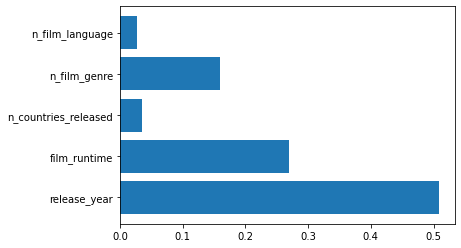

In [29]:
RF.fit(X,y)
rf_scores = pd.DataFrame(RF.feature_importances_,index = X_cols)

from matplotlib import pyplot as plt
%matplotlib inline

plt.barh(X_cols, RF.feature_importances_);

In [33]:
rf_scores.sort_values(by =0, ascending=False)

,0
release_year,0.508462
film_runtime,0.269948
n_film_genre,0.159816
n_countries_released,0.034967
n_film_language,0.026806
